com_error: (-2147221005, 'Invalid class string', None, None)

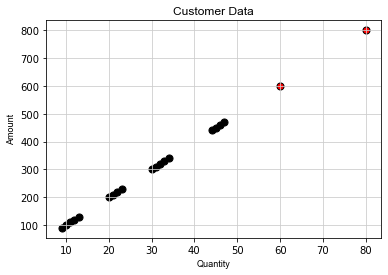

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import smtplib
from email import encoders
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20,20
%matplotlib inline
import win32com.client as win32
import os
from datetime import datetime

data = [['AAA',9,90],['BBB',10,100],['CCC',11,110],['DDD',12,120],['EEE',13,130],['FFF',20,200], ['GGG',21,210],['HHH',22,220],['III',23,230],['JJJ',80,800],['KKK',60,600],['LLL',30,300],['MMM',31,310],['NNN',32,320],['OOO',33,330],['PPP',34,340], ['QQQ',44,440],['RRR',45,450],['SSS',46,460],['TTT',47,470]]
df = pd.DataFrame(data,columns=['Name','Quantity','Amount'])
receiver_emails = ["danarms.2421@outlook.com"]


def variance_report(df, receiver_emails):
    dbscan_data = df[['Quantity','Amount']]
    dbscan_data = dbscan_data.values.astype('int64', copy=False)
    dbscan_data_scaler = StandardScaler().fit(dbscan_data)
    dbscan_data = dbscan_data_scaler.transform(dbscan_data)
    model = DBSCAN(eps=1, min_samples=5, metric='euclidean').fit(dbscan_data)
    outlier_df = df[model.labels_==-1]
    cluster_df = df[model.labels_!=-1]
    variance_data = pd.DataFrame(outlier_df,columns=['Name','Quantity','Amount'])
    variance_data_html = variance_data.to_html(index = False)
       
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(cluster_df['Quantity'], cluster_df['Amount'], c='black', edgecolors='black', s=50)
    ax.scatter(outlier_df['Quantity'], outlier_df['Amount'], c='red', edgecolors='black', s=50)
    ax.set_xlabel('Quantity', family='Arial', fontsize=9)
    ax.set_ylabel('Amount', family='Arial', fontsize=9)
    plt.title('Customer Data', family='Arial', fontsize=12)
    plt.grid(which='major',color='#cccccc')
    my_path = os.path.dirname(os.path.abspath("__file__"))
    plt.savefig(os.path.join(my_path, 'variance_chart.png'), dpi = 100)
    my_file = my_path + '\\variance_chart.png'
   
    today = datetime.today ()
    dt = str(today)
   
    outlook = win32.Dispatch('outlook.application')
    mail = outlook.CreateItem(0)
    mail.To = 'danarms.2421@outlook.com'
    mail.Subject = 'Data Anomaly Report'
    mail.Body = 'This is a test email.'
    mail.Attachments.Add(my_file)
    attachment = mail.Attachments.Add(my_file)
    attachment.PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", "MyId1")
    mail.HTMLBody ="""\
                        <html>
                            <head>
                                <style>
                                      table, th, td {{ border: 1px solid black; border-collapse: collapse;}}
                                      th, td {{ padding: 5px; background:#FFFF00; }}
                                 </style>
                            </head>
                            <body>
                              <div style="font-family:Arial, Helvetica, sans-serif; font-size:14px; color:#000000;">
                                 <p><b>Data Anomaly Alert!</b><br><br><br>
                                    <b>Variance Report:</b><br><br>
                                    Number of outliers found: {0}. The details are as follows:
                                        {1}
                                    <br><b>Variance Chart:</b><br>
                                        <img alt="Variance Chart" src= "cid:MyId1"><br>
                                    <br><b>Report Details:</b>
                                    <br>Variance calculated using: DBSCAN Clustering Algorithm
                                    <br>The report is generated at:{2}
                                </p>
                              </div>
                            </body>
                        </html>
                        """.format(len(outlier_df), variance_data_html, dt)
    try:
        mail.Send()
        status = "Email Sent Successfully!"
    except SMTPException:
        status = ("Error: Unable to Send Email.")      
    return status  
   
   
email_status = variance_report(df, receiver_emails)
print(email_status)